### 2.3.6 Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Data shape: (100, 2)
Target shape: (100,)


In [5]:
print(X_train)

[[ 0.087  0.494]
 [ 1.533 -0.031]
 [ 0.653  0.809]
 [ 0.641 -0.199]
 [-0.087 -0.039]
 [ 0.874  0.838]
 [ 1.263  0.129]
 [-0.187  0.862]
 [ 0.911  0.127]
 [-0.047 -0.016]
 [ 1.116  0.018]
 [ 1.66   0.348]
 [ 0.471 -0.092]
 [ 1.685  0.334]
 [ 0.067 -0.339]
 [ 0.118  1.418]
 [ 0.792 -0.405]
 [-1.007  0.413]
 [-0.595  0.961]
 [-0.542  0.723]
 [-0.246  0.378]
 [ 0.884 -0.354]
 [-1.065  0.568]
 [-0.113  0.934]
 [ 0.613  0.98 ]
 [ 2.287  0.472]
 [-0.534  0.502]
 [ 0.508  0.039]
 [ 1.764 -0.126]
 [ 1.686 -0.134]
 [ 0.319  0.053]
 [ 1.319 -0.414]
 [-1.147 -0.387]
 [-1.2    0.464]
 [-0.339  1.17 ]
 [-0.72   0.691]
 [ 0.019  1.328]
 [ 0.734 -0.41 ]
 [ 1.385 -0.476]
 [ 0.857  0.066]
 [ 0.229  0.88 ]
 [ 1.568 -0.059]
 [ 1.963 -0.238]
 [ 1.658  0.211]
 [ 0.62   0.752]
 [ 1.719  0.329]
 [ 1.48   0.087]
 [ 0.652  0.385]
 [ 0.266  0.782]
 [ 1.878  0.568]
 [ 1.223 -0.369]
 [ 0.292  0.404]
 [ 1.068  0.758]
 [ 0.56  -0.165]
 [ 0.29   1.008]
 [ 0.739  0.308]
 [ 0.486  0.203]
 [ 0.915 -0.504]
 [ 0.474  0.14

In [6]:
print(y_train)

[1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 0]


In [7]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

- RandomForestClassifier
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - 각 트리에 대해 독립적인 bootstrap sample 생성
    - bootstrap samples
      - n_samples 개의 데이터 포인트 중에서 무작위로 n_samples 개의 데이터를 추출 (하나의 샘플이 중복되어 추출 가능)
  - n_estimators
    - 생성할 트리의 개수    
  - max_features
    - 각 트리 노드에서 후보 특성을 무작위로 선정
    - 그러한 선정 작업시에 몇 개의 특성까지 선정할지를 결정함
    - 후보 특성을 선정하는 작업은 매 노드마다 반복 --> 각 노드는 서로 다른 후보 특성을 사용하게 됨
    - max_features를 n_features로 설정하면 각 노드에서 모든 특성을 고려 --> 무작위성이 줄어들게 됨
    - max_features를 1로 설정하면 각 노드에서 선택된 특성의 임계값만으로 분기 --> 트리의 깊이가 깊어짐
    - 기본값: auto
      - RandomForestClassifier: sqrt(n_features)
      - RandomForestRegressor: n_features
  - n_jobs
    - 사용할 CPU 코어 수 지정
    - n_jobs = -1 로 지정하면 컴퓨터의 모든 코어 사용
  - random_state
    - 서로 다른 random_state에 대해 전혀 다른 트리들이 생성
  - max_depth
    - 사전 가지치기 옵션
  - min_samples_split: int, float, optional (default=2)
    - The minimum number of samples required to split an internal node:
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [8]:
mat = np.ones((2,3))
print(mat.shape)
print(mat)

print()

mat2 = mat.ravel()
print(mat2.shape)
print(mat2)

(2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]

(6,)
[1. 1. 1. 1. 1. 1.]


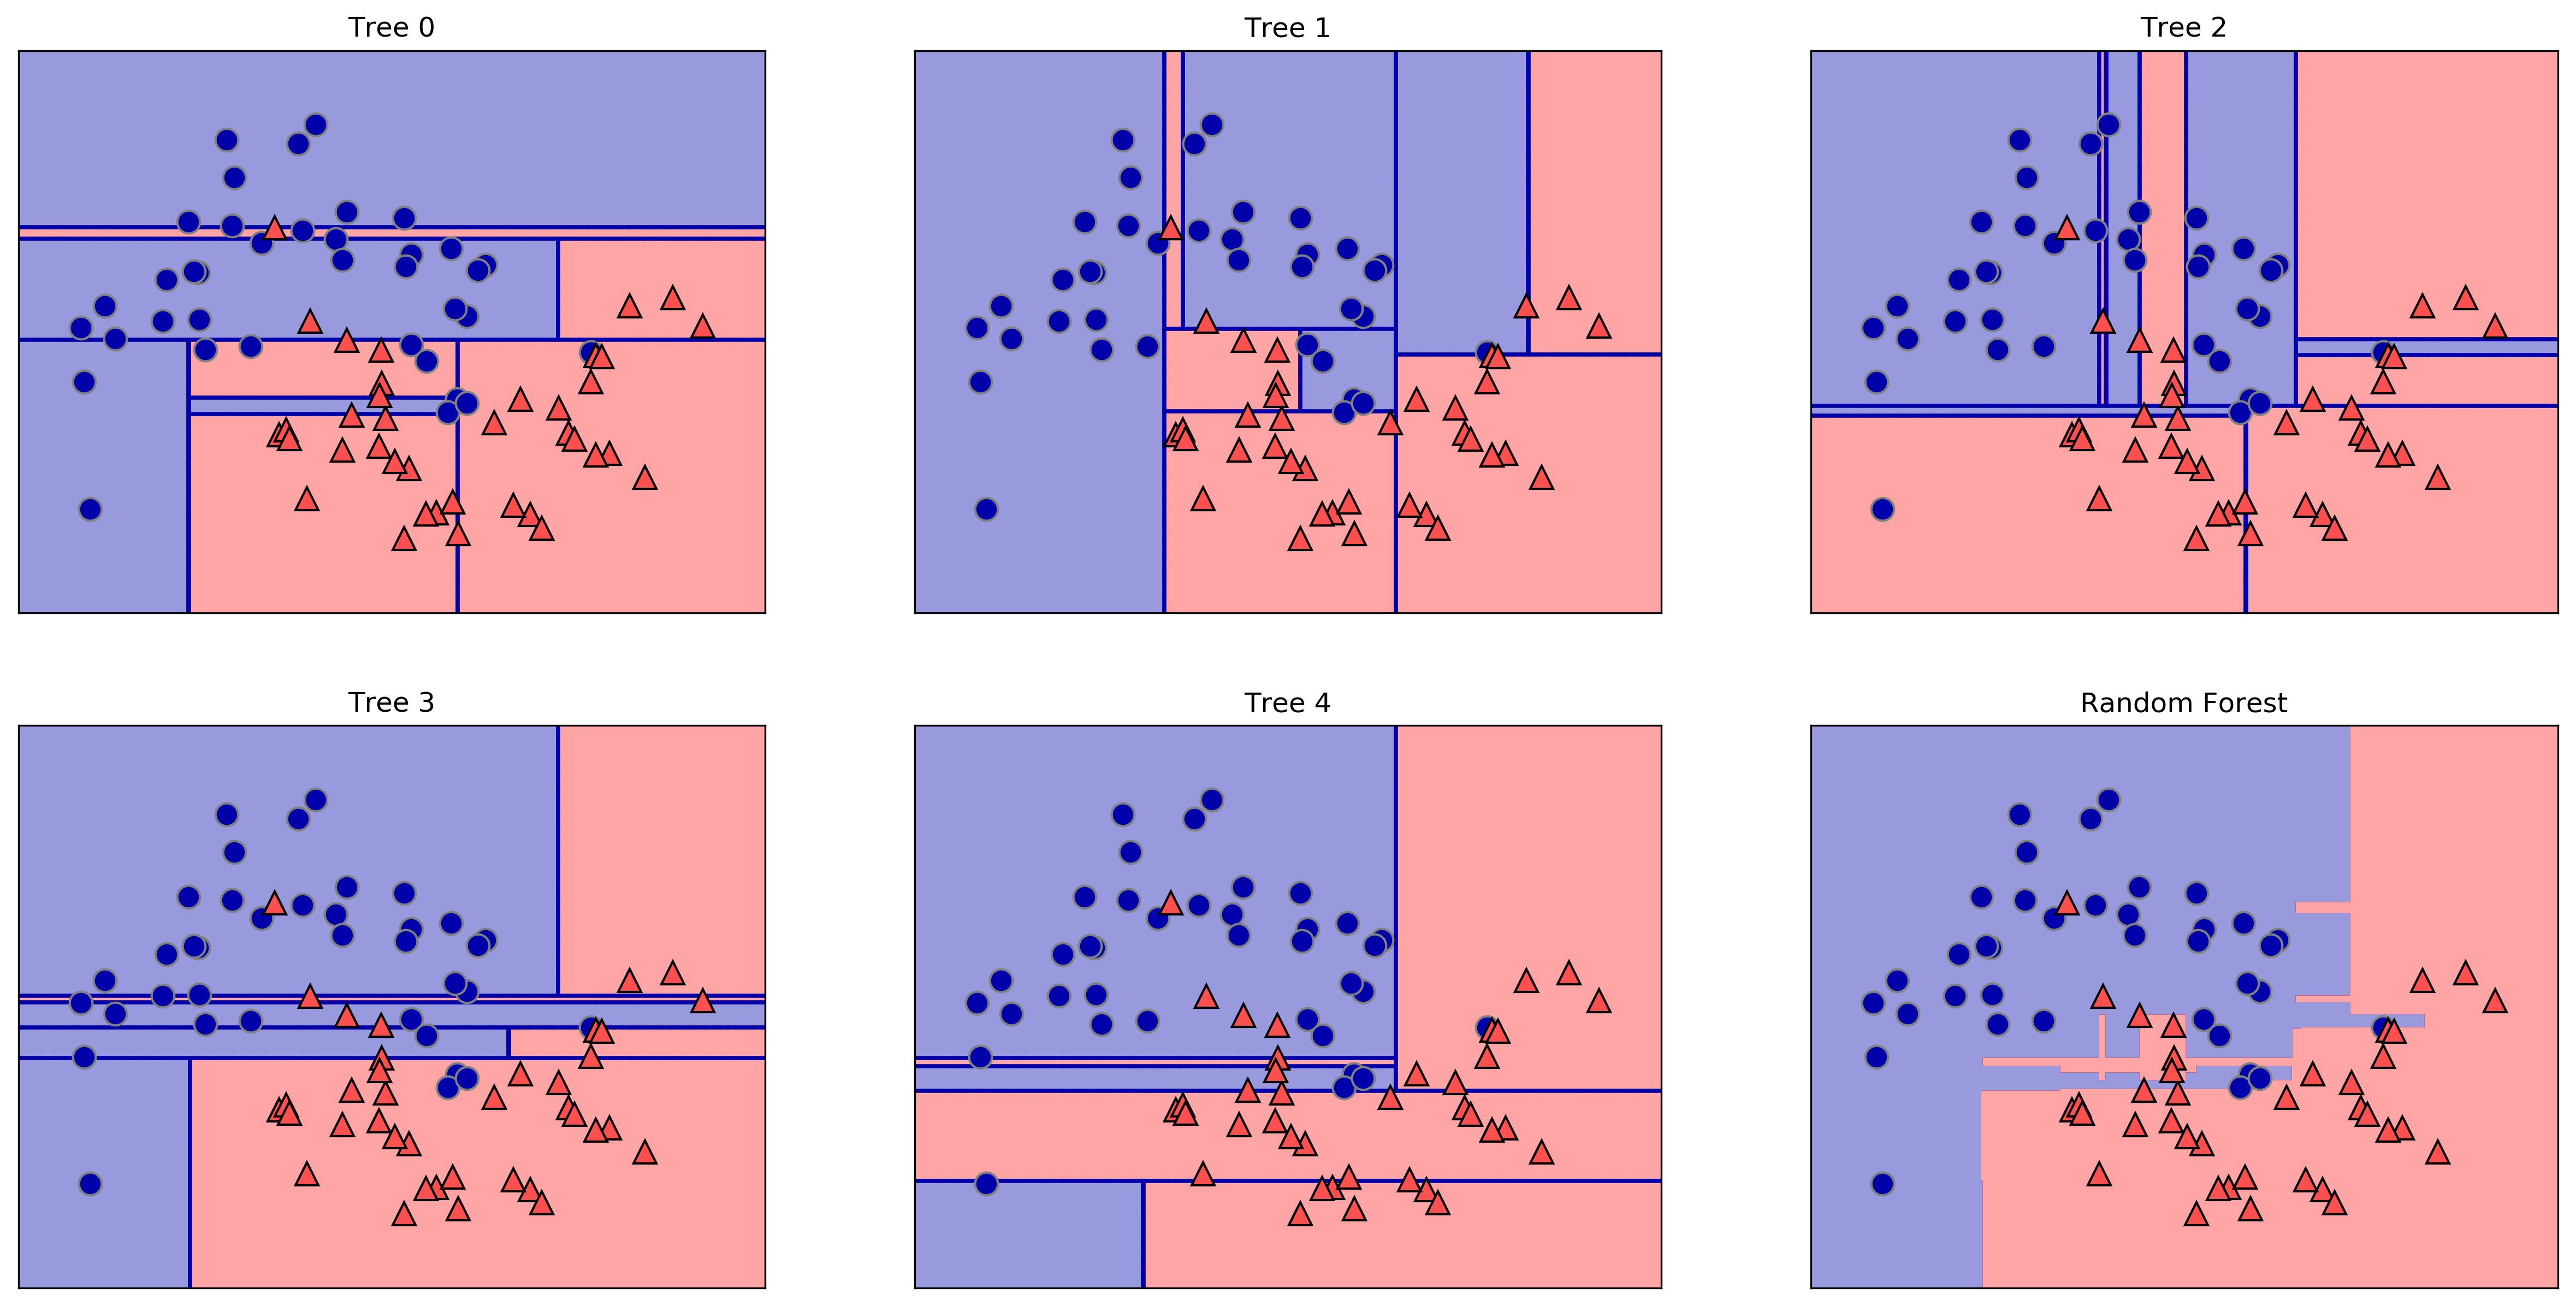

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [15]:
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    print(i)
    print(ax)
    print(tree)
    break

0
AxesSubplot(0.125,0.536818;0.227941x0.343182)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1872583848, splitter='best')


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [19]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [22]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.show()

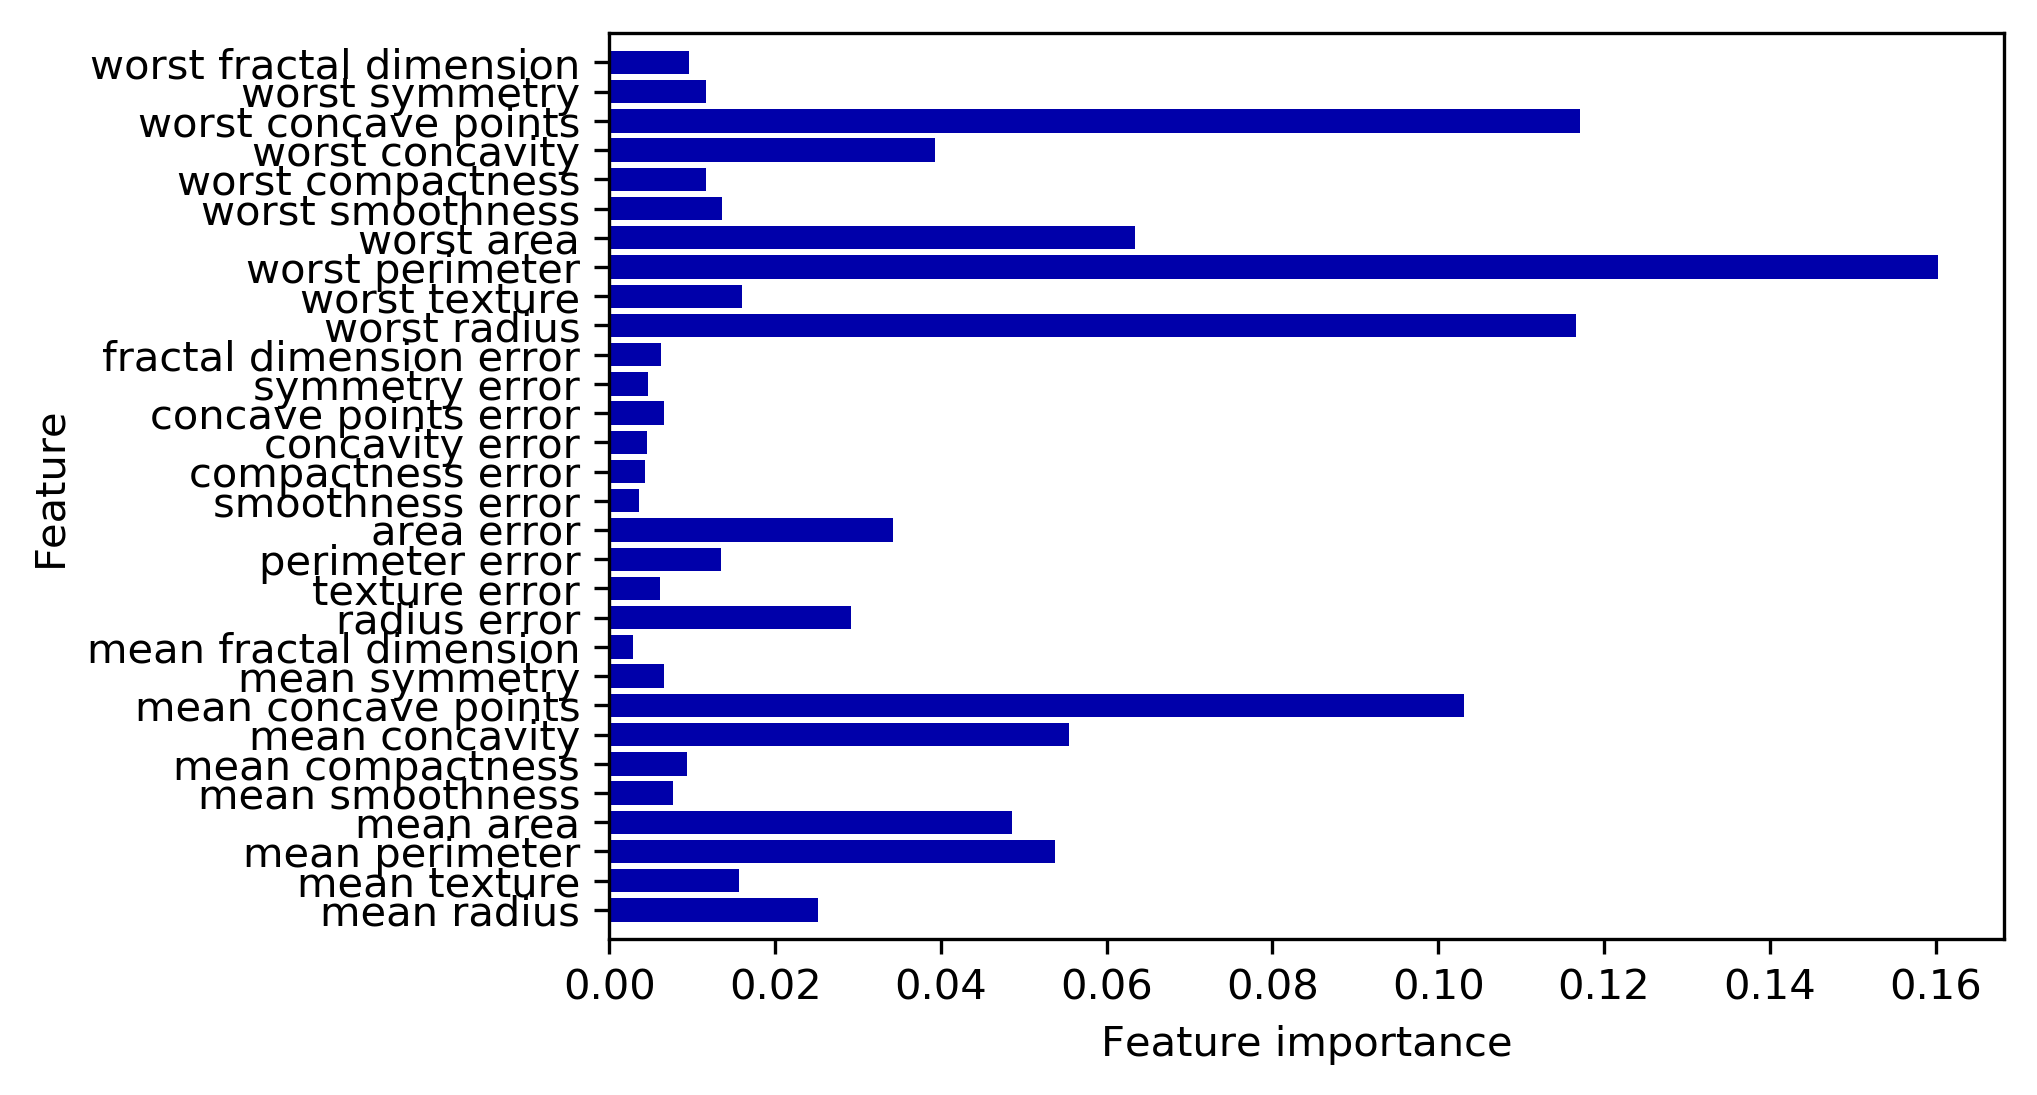

<Figure size 640x480 with 0 Axes>

In [23]:
plot_feature_importances_cancer(forest)

- 랜덤 포레스트를 만드는 무작위성
  - 알고리즘이 가능성 있는 많은 경우를 고려할 수 있게 해줌
  - 단일 트리 방식보다 더 넓은 시각으로 데이터를 바라볼 수 있게 해줌

###### Strengths, weaknesses, and parameters
- 랜던 포레스트는 회귀와 분류에 있어서 가장 널리 사용되는 머신러닝 알고리즘
- 대부분의 경우에 있어서 성능이 뛰어나고 매개변수 튜닝없이도 잘 작동
- 데이터 feature개수가 많지만 (차원이 높고) 희소한 데이터에서는 성능이 낮음
- 선형 모델보다 속도가 느리고 더 많은 메모리 사용
- 가용한 시간과 메모리가 허용하는 한 n_estimators는 클수록 좋음 --> 더 많은 트리 사용

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 구성
- 기본적으로 무작위성이 없음 
- 강력한 사전 가지치기 사용
  - 1~5 레벨 정도의 깊지 않은 트리 구성
  - 메모리를 적게 사용하고 예측도 빠름
- 많은 개수의 Weak Learner (얕은 트리의 간단한 모델)를 활용
- 주요 파라미터: learning_rate, n_estimators
  - learning_rate가 크면 이전 트리의 보정을 강하게 하기 때문에 더 복잡한 모델을 구성하게 됨.
  - n_estimators 값을 키워서 앙상블 내에 트리의 개수를 증가시키는 것이 좋음.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


- GradientBoostingClassifier 파라미터 기본값
  - max_depth=3 (트리 깊이 3)
  - n_estimators = 100 (트리 100개)
  - learning_rate = 0.1

In [37]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [38]:
for i in range(10):
    gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
    gbrt.fit(X_train, y_train)

    print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965
Accuracy on training set: 0.988
Accuracy on test set: 0.965


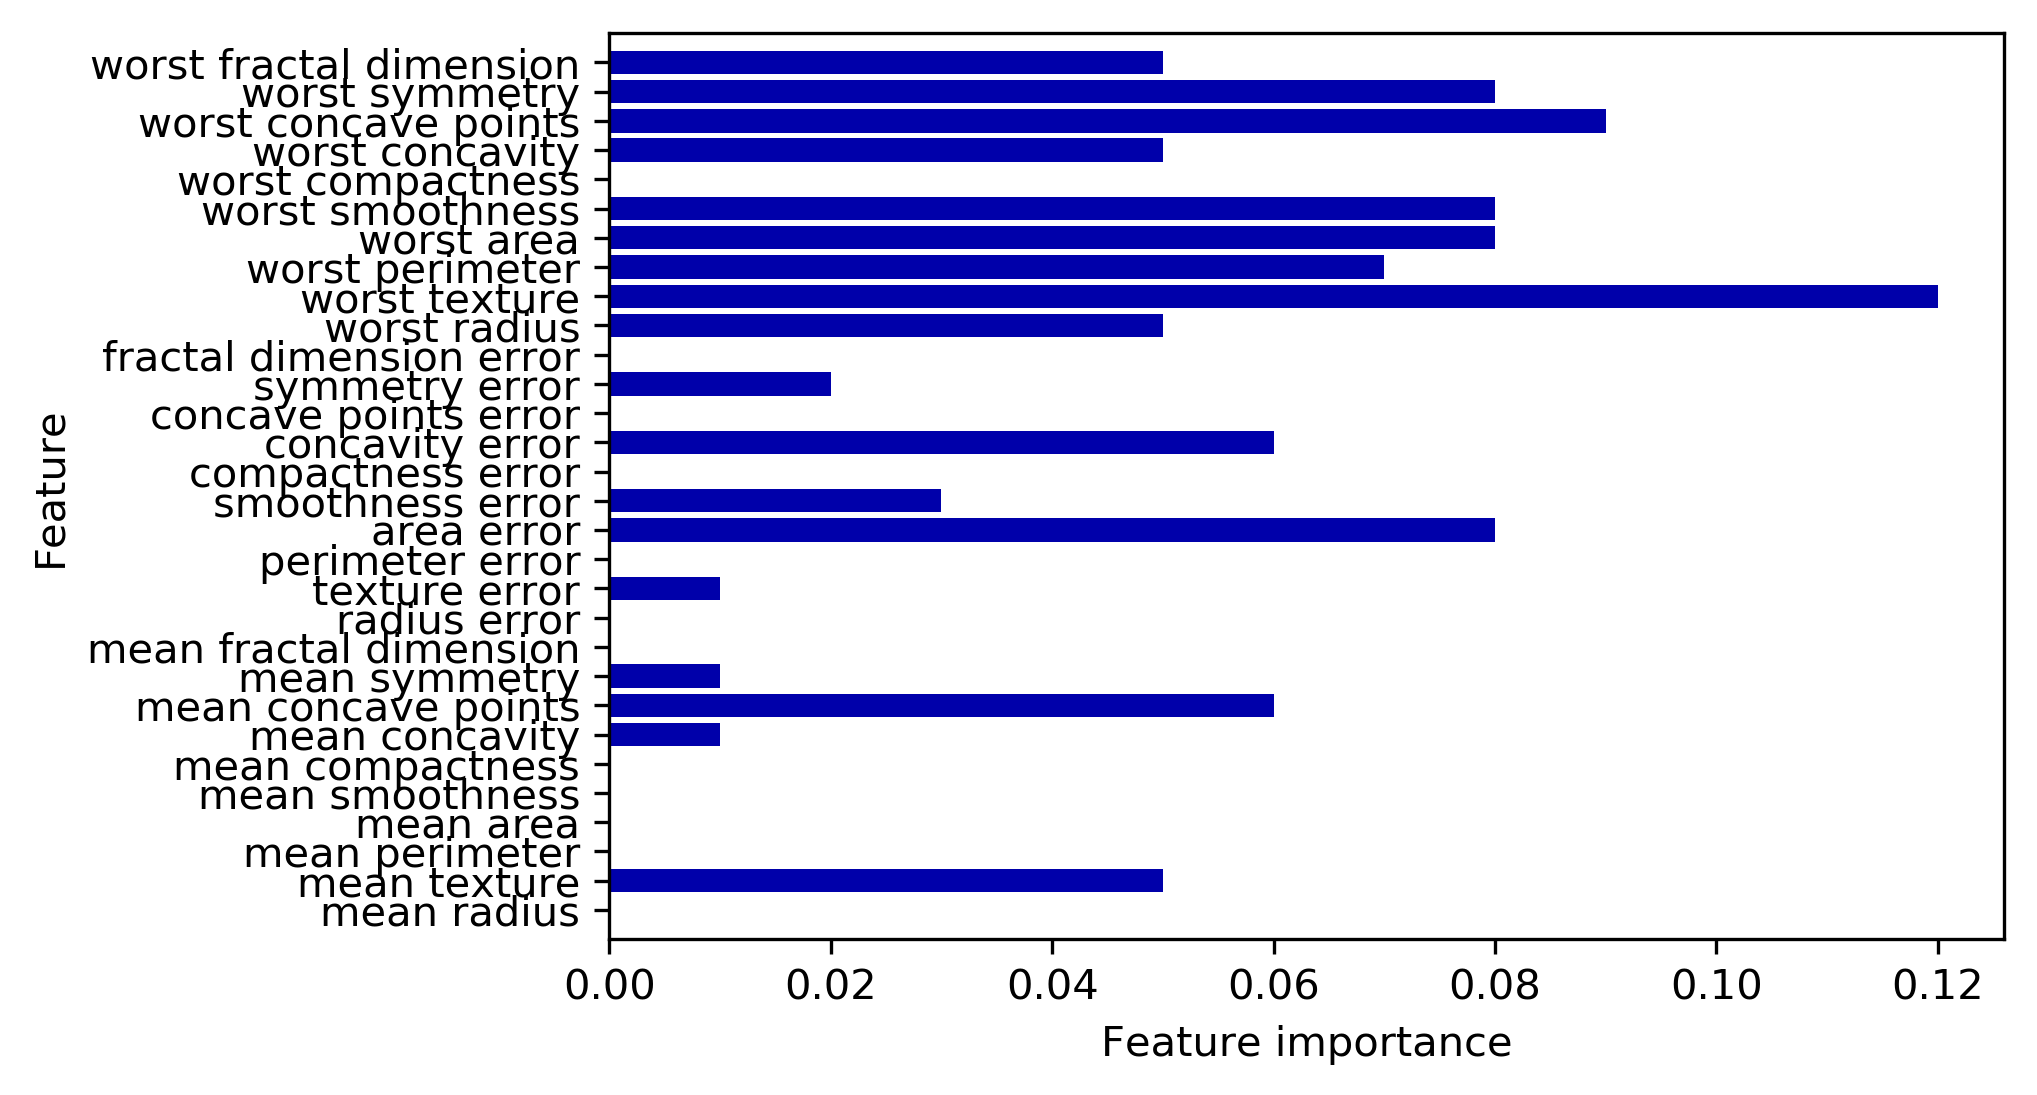

<Figure size 640x480 with 0 Axes>

In [27]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters
- GradientBoostingClassifier 방법
  - 지도학습에서 가장 강력하고 널리 사용되는 모델 중 하나
  - 단점
    - 매개변수 조정 필요
    - 훈련시간이 다소 길다.
    - 특성들에 대해 희소한 고차원 데이터에서 잘 작동하지 않음
<!-- more -->
<br/><br/>
- xgboost (https://xgboost.readthedocs.io) 사용 검토 필요
  - 대용량 분산 처리 지원
  - GPU 활용 플러그인 지원